In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#Load csv
df = pd.read_csv('/Users/davidkim/Downloads/data_jobs.csv')

#Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda skills: ast.literal_eval(skills)
    if pd.notnull(skills) else skills)

In [55]:
#Filter for jobs only in the US
df_US = df[df['job_country'] == 'United States'].copy()

In [56]:
#Expand (explode) out job skills column
df_US_skills = df_US.explode('job_skills')

In [57]:
#Group by job title and job skills in order to get skill count per job
df_US_skills_count = df_US_skills.groupby(by=['job_title_short', 'job_skills']).agg(
    skill_count=('job_skills', 'size')
).reset_index().sort_values(by='skill_count', ascending=False)
df_US_skills_count.head()

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022


In [58]:
#Get the top 3 most popular Data jobs in the US
job_titles = sorted(df_US_skills_count['job_title_short'].unique().tolist()[:3])

In [59]:
#Get the total number of job postings for each job title
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

#Merge the DataFrame with the US job title and skills count with the DataFrame with # of job postings for each job
df_US_skills_perc = pd.merge(left=df_US_skills_count, right=df_job_title_count, how='left', on='job_title_short')

#Create a new column that contains the percentage of jobs that require 'x' skill
df_US_skills_perc['skill_percent'] = round(((df_US_skills_perc['skill_count'] / df_US_skills_perc['jobs_total']) * 100), 2)

df_US_skills_perc.head()

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.04
1,Data Analyst,sql,34452,67816,50.80
2,Data Scientist,sql,30034,58830,51.05
3,Data Analyst,excel,27519,67816,40.58
4,Data Scientist,r,26022,58830,44.23


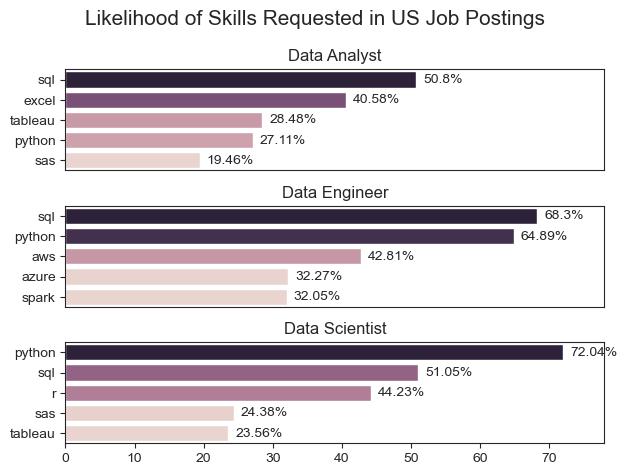

In [63]:
#Create plot
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_style(style='ticks')

#Visualize plot
for i, job_title in enumerate(job_titles):
    df_plot = df_US_skills_perc[df_US_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count')
    #Label/Format plot
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 78)
    
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{(v)}%', va='center')
        
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout()
plt.show()
